<a href="https://colab.research.google.com/github/vilacco/gold_price/blob/main/gold_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выгрузка данных


In [1]:
import pandas as pd
import numpy as np

In [2]:
! kaggle datasets download -d sid321axn/gold-price-prediction-dataset
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle datasets download -d altruistdelhite04/gold-price-data

  0% 0.00/41.9k [00:00<?, ?B/s]
100% 41.9k/41.9k [00:00<00:00, 33.5MB/s]


In [4]:
! unzip gold-price-data.zip

Archive:  gold-price-data.zip
  inflating: gld_price_data.csv      


In [5]:
df = pd.read_csv('/content/gld_price_data.csv')

EDA

In [6]:
df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [7]:
df.shape

(2290, 6)

In [8]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]

In [9]:
features_na

[]

In [10]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (feature not in ['GLD']))]

In [11]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['GLD']))]

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

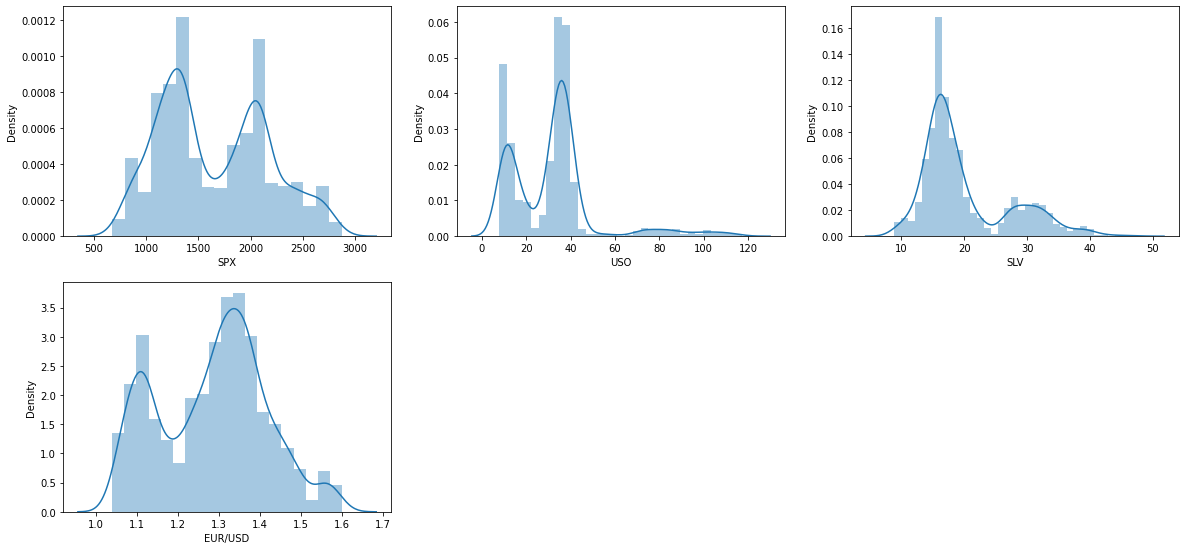

In [13]:
plt.figure(figsize = (20, 60), facecolor = 'white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()         

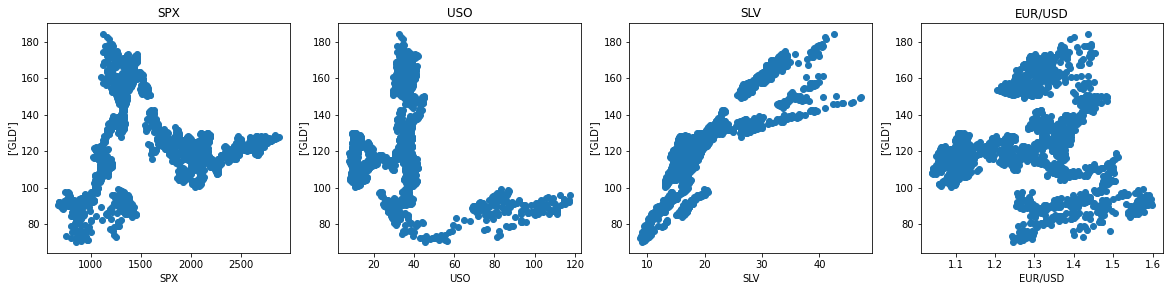

In [14]:
plt.figure(figsize = (20, 60), facecolor = 'white')
plotnumber = 1 
for feature in numerical_features:
    df1 = df.copy()
    ax = plt.subplot(12, 4, plotnumber)
    plt.scatter(df1[feature], df1['GLD'])
    plt.xlabel(feature)
    plt.ylabel(['GLD'])
    plt.title(feature)
    plotnumber += 1
plt.show()    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

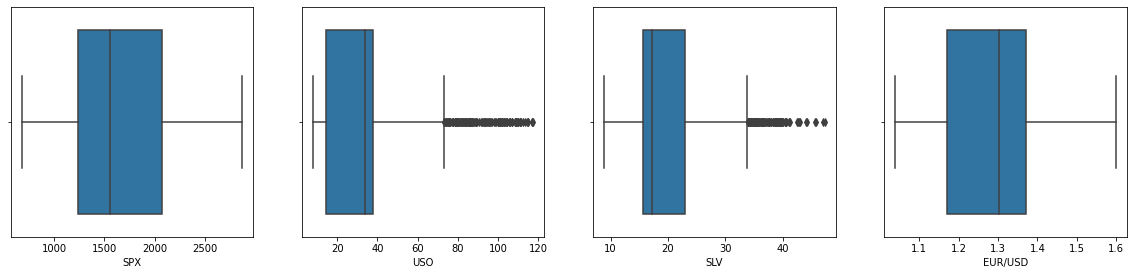

In [15]:
plt.figure(figsize = (20, 60), facecolor = 'white')
plotnumber = 1
for feature in numerical_features:
    ax = plt.subplot(12, 4, plotnumber)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plotnumber += 1
plt.show()    

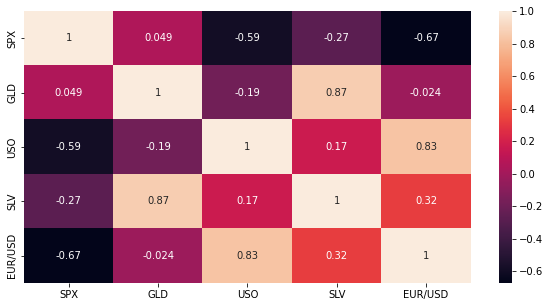

In [16]:
corr_mat = df.corr()
figure = plt.figure(figsize = (10, 5))
sns.heatmap(corr_mat, annot = True)
plt.show() 

Модель


In [45]:
df2 = df.copy()

In [46]:
df2.drop(['Date'], axis = 1, inplace = True)

In [47]:
X = df2.drop(['GLD'], axis = 1)
Y = df2['GLD']

In [20]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test, = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [44]:
def find_model_gridsearch(X, Y):
    algs = {'dec_tree': {'model' : DecisionTreeRegressor(),
                         'params' : {'criterion' : ['squared_error', 'friedman_mse'],
                                     'splitter' : ['best', 'random']}},
            'random_forest' : {'model' : RandomForestRegressor(),
                               'params' : {'n_estimators' : [10, 50, 100, 130],
                                           'criterion' : ['squared_error'],
                                           'max_depth' : [2, 3],
                                           'max_features' : ['auto', 'log2']}},
            'XGBRegressor' : {'model' : XGBRegressor(objective ='reg:squarederror'),
                              'params' : {'learning_rate' : [0.5, 0.1, 0.01, 0.001],
                                          'max_depth' : [2, 3],
                                          'n_estimators' : [10, 50, 100, 200]}}}
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo, config in algs.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X, Y)
        scores.append({
            'model' : algo,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params']).sort_values(by = 'best_score', ascending = False)


In [43]:
pd.set_option('display.max_colwidth', 100)
find_model_gridsearch(X, Y)

,model,best_score,best_params
2,XGBRegressor,0.984461,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"
0,dec_tree,0.982972,"{'criterion': 'squared_error', 'splitter': 'random'}"
1,random_forest,0.909556,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}"


In [52]:
model = XGBRegressor(learning_rate = 0.5, max_depth = 3, n_estimators = 200, objective ='reg:squarederror')

In [53]:
model.fit(X_train, Y_train)

XGBRegressor(learning_rate=0.5, n_estimators=200, objective='reg:squarederror')

In [54]:
model.score(X_test, Y_test)

0.9875798991931406

In [55]:
Y_pred = model.predict(X_test)

In [59]:
Y_pred = pd.DataFrame(Y_pred)

In [60]:
Y_pred

,0
0,127.839714
1,117.780029
2,139.863617
3,121.721291
4,91.459137
...,...
453,120.609161
454,131.301804
455,157.761337
456,115.637550


In [58]:
Y_test

1255    128.789993
2100    115.620003
711     139.220001
1328    120.930000
53       93.040001
           ...    
2085    120.360001
1362    129.130005
828     159.869995
567     117.339996
1693    106.379997
Name: GLD, Length: 458, dtype: float64